# Support Vector Machines - SVM
## Laboratorio 3

## [Fraude en el Vino](https://en.wikipedia.org/wiki/Wine_fraud)

El fraude en el vino se relaciona a los aspectos comerciales del vino.  El tipo más prevalente de fraude es aquel en el cual los vinos son adulterados, generalmente con la adición de productos más baratos (e.g. jugos) y, a veces, con químicos dañinos y endulcorantes (para compensar el color o sabor).

La falsificación y la re-etiquetación de vinos inferiores y más baratos haciéndolos parecer marcas más caras es otro tipo común de fraude con vino.

<img src="wine.jpg">

## Objetivos del Laboratorio

Una compañía distribuidora, que recientemente fue víctima de fraude, ha completado una auditoría de varias muestras de vino a través del uso de análisis químico.  La compañía se especializa en la exportación de vinos de una calidad extremadamente alta y muy valiosos.  El fraude fue cometido por un proveedor que intentó pasar vinos baratos, de calidad inferior, como vinos de más alta gama.  La compañía distribuidora los ha contratado a Ustedes para intentar crear un modelo de aprendizaje de máquina (ML) que pueda ayudar a detectar muestras de vino de calidad baja ("fraude").  Quieren saber si siquiera es posible detectar tal diferencia.  


Fuente de datos: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**La meta general es utilizar el conjunto de datos adjunto para desarrollar un modelo que intenta predecir si un vino es legítimo "Legit" o fraudulento "Fraud" basado en varias características químicas.**

---
---

**Rubrica**

**(50 puntos) Análisis Exploratorio:**
* Identifica el tipo de archivo .data y la forma de leerlo
* Estudia las variables cuantitativas mediante técnicas de estadística descriptiva
* Hace gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos
* Analiza las correlaciones entre las variables, trata de explicar los outliers (datos atípicos) y toma decisiones acertadas ante la presencia de valores faltantes.
* Estudia las variables categóricas
* Elabora gráficos de barra, tablas de frecuencia y de proporciones
* Elabora gráficos adecuados según el tipo de dato que representan
* Explica muy bien todos los procedimientos y los hallazgos que va haciendo.
* Realiza la limpieza de datos para que se tenga un conjunto de datos que permita usar modelos

**(36 puntos) Clasificación**
* Realiza varios modelos de Clasificación, analiza los resultados para identificar el de mejor rendimiento
        
**(14 puntos) Hallazgos y conclusiones.**
* Hace la recomendación correcta para la Compañía Distribuidora

**NOTA:  Al usar SVC, anteriormente hemos dejado el modelo en blanco, (e.g. sin parámeteros).  Sin embargo, en estos datos las clases no están balanceadas.  Para intentar remediar este problema, podemos ajustar automáticamente los pesos de forma inversamente proporcional a las frecuencias de las clases en los datos con una llamada en la invocación de SVC().  Ver la [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) en-línea y averiguen cuál es el argumento\parámetro.**

Identifica el tipo de archivo .data y la forma de leerlo

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("wine_fraud.csv")

print(df.head())  # muestra las primeras 5 filas del DataFrame

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality type  
0      9.4   Legit  red  
1      9.8   Legit  red  
2      9

Estudia las variables cuantitativas mediante técnicas de estadística descriptiva

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

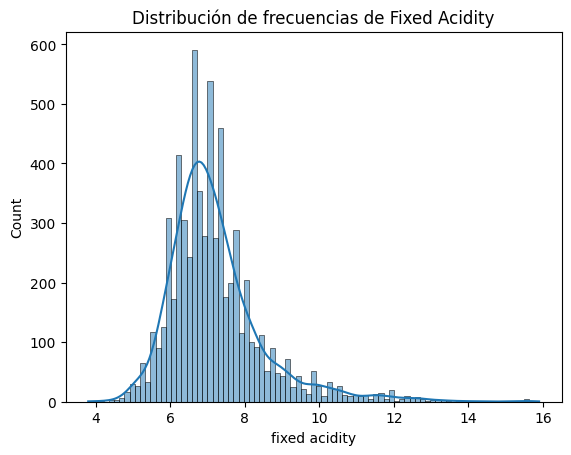

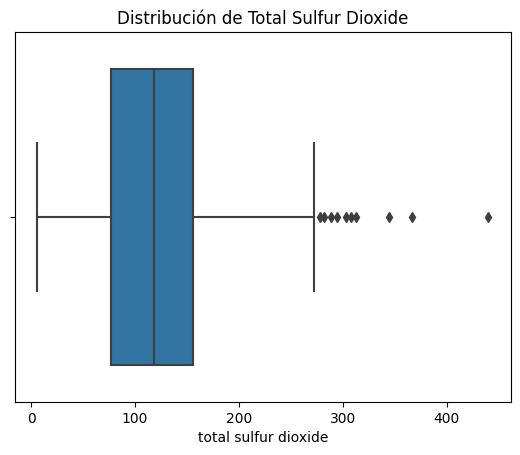

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidit

C:\Users\omen\AppData\Local\Temp\ipykernel_23580\3717079714.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [29]:
# resumen estadístico
print(df.describe())

# histograma de la variable 'fixed acidity'
sns.histplot(df['fixed acidity'], kde=True)
plt.title('Distribución de frecuencias de Fixed Acidity')
plt.show()

# boxplot de la variable 'total sulfur dioxide'
sns.boxplot(x=df['total sulfur dioxide'])
plt.title('Distribución de Total Sulfur Dioxide')
plt.show()

# matriz de correlación
corr_matrix = df.corr()

print(corr_matrix)

Hace gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos

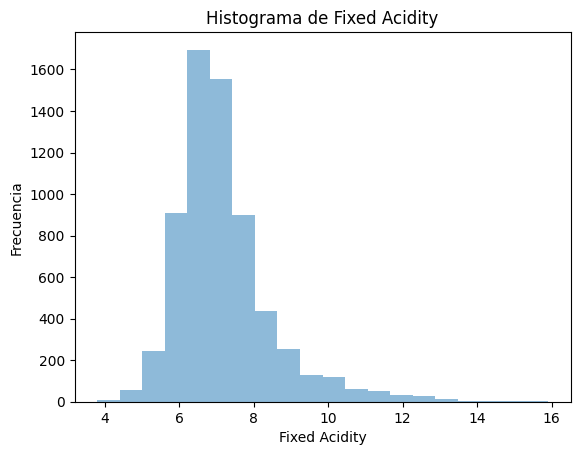

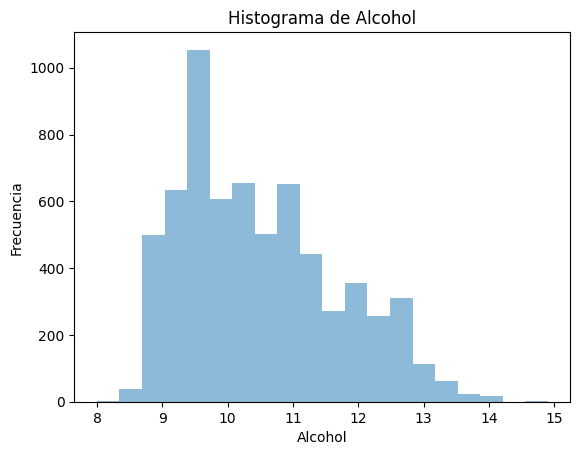

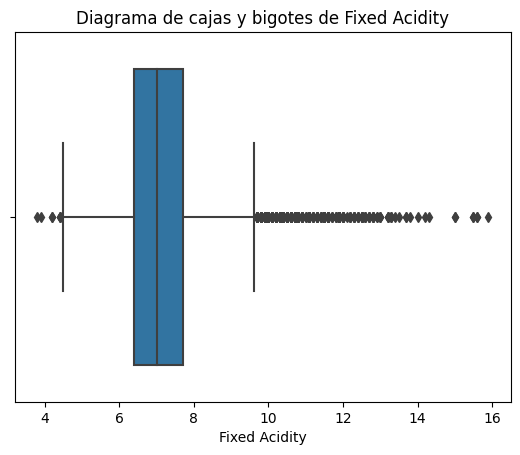

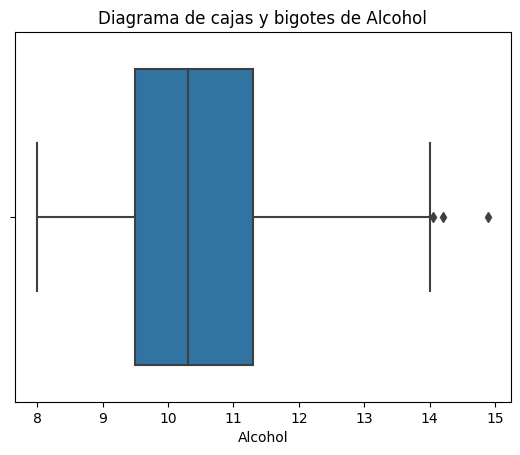

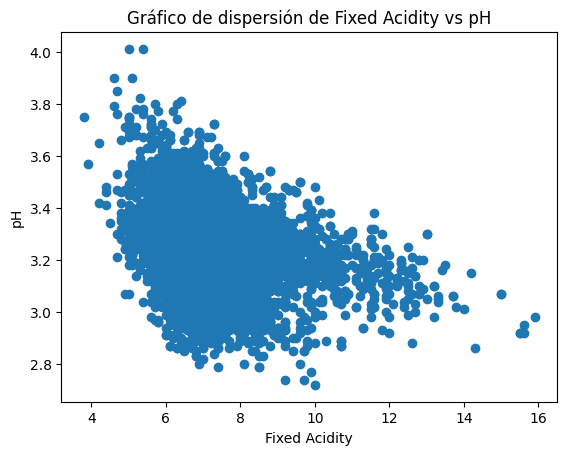

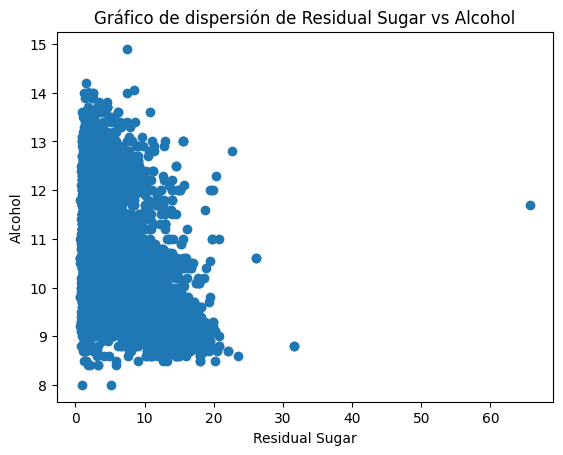

In [30]:
# Histograma de la variable 'fixed acidity'
plt.hist(df['fixed acidity'], bins=20, alpha=0.5)
plt.xlabel('Fixed Acidity')
plt.ylabel('Frecuencia')
plt.title('Histograma de Fixed Acidity')
plt.show()

# Histograma de la variable 'alcohol'
plt.hist(df['alcohol'], bins=20, alpha=0.5)
plt.xlabel('Alcohol')
plt.ylabel('Frecuencia')
plt.title('Histograma de Alcohol')
plt.show()

# Diagrama de cajas y bigotes de la variable 'fixed acidity'
sns.boxplot(x=df['fixed acidity'])
plt.xlabel('Fixed Acidity')
plt.title('Diagrama de cajas y bigotes de Fixed Acidity')
plt.show()

# Diagrama de cajas y bigotes de la variable 'alcohol'
sns.boxplot(x=df['alcohol'])
plt.xlabel('Alcohol')
plt.title('Diagrama de cajas y bigotes de Alcohol')
plt.show()

# Gráfico de dispersión de 'fixed acidity' y 'pH'
plt.scatter(df['fixed acidity'], df['pH'])
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.title('Gráfico de dispersión de Fixed Acidity vs pH')
plt.show()

# Gráfico de dispersión de 'residual sugar' y 'alcohol'
plt.scatter(df['residual sugar'], df['alcohol'])
plt.xlabel('Residual Sugar')
plt.ylabel('Alcohol')
plt.title('Gráfico de dispersión de Residual Sugar vs Alcohol')
plt.show()

Analiza las correlaciones entre las variables, trata de explicar los outliers (datos atípicos) y toma decisiones acertadas ante la presencia de valores faltantes.

C:\Users\omen\AppData\Local\Temp\ipykernel_23580\3412284010.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


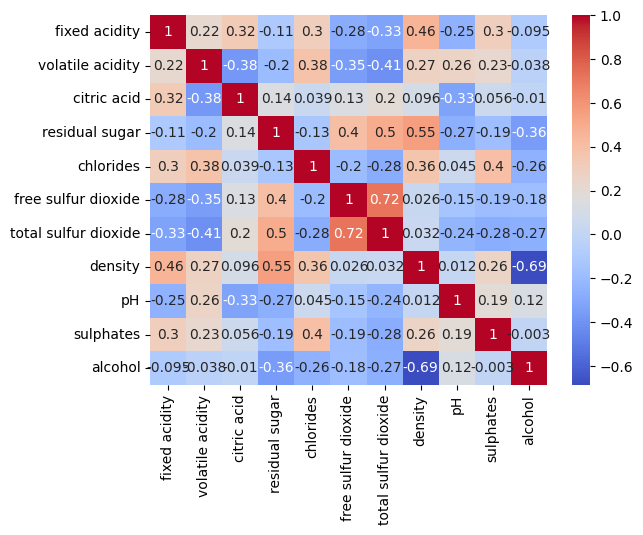

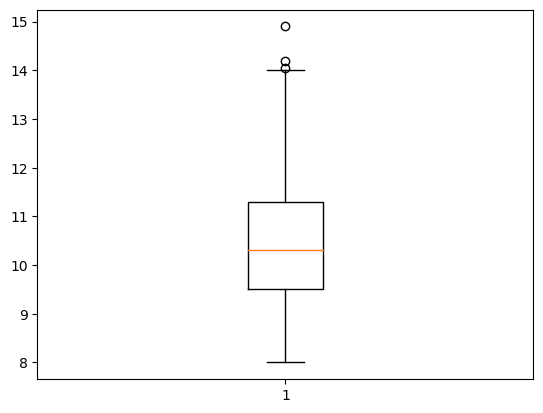

C:\Users\omen\AppData\Local\Temp\ipykernel_23580\3412284010.py:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [31]:
# Matriz de correlación
corr = df.corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Diagrama de caja y bigotes
plt.boxplot(df['alcohol'])
plt.show()

# Contar los valores faltantes
df.isnull().sum()

# Reemplazar los valores faltantes con la media
df.fillna(df.mean(), inplace=True)

Estudia las variables categóricas

col_0  count
type        
red     1599
white   4898
col_0    count
quality       
Fraud      246
Legit     6251


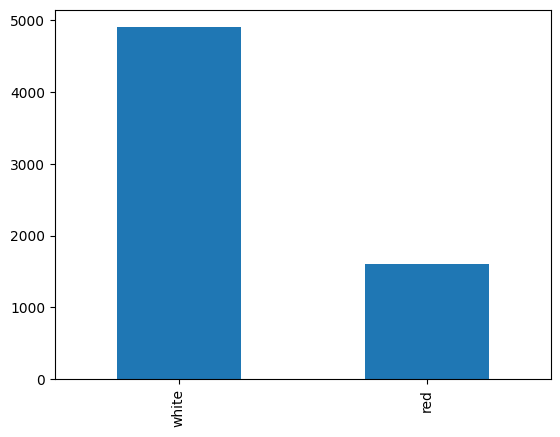

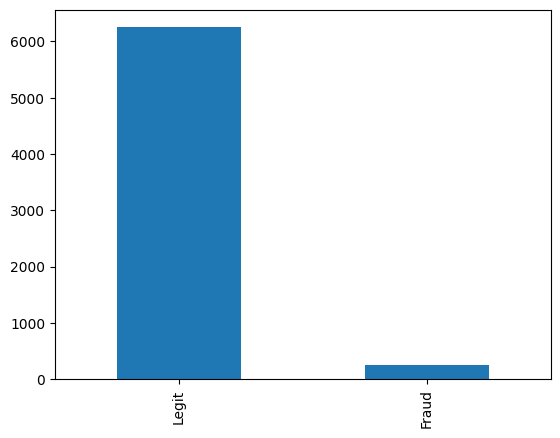

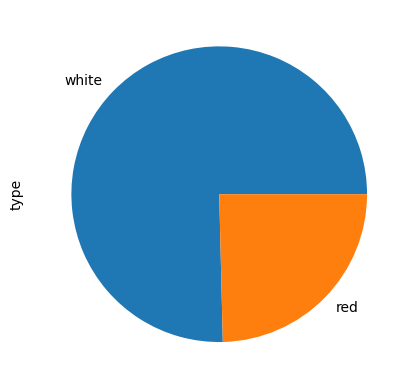

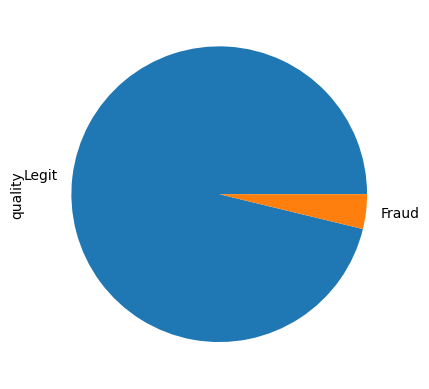

In [32]:
# tabla de frecuencias
freq_table = pd.crosstab(index=df["type"], columns="count")
print(freq_table)
freq_table = pd.crosstab(index=df["quality"], columns="count")
print(freq_table)

# gráfico de barras
df['type'].value_counts().plot(kind='bar')
plt.show()
df['quality'].value_counts().plot(kind='bar')
plt.show()

# gráfico de torta
df['type'].value_counts().plot(kind='pie')
plt.show()
df['quality'].value_counts().plot(kind='pie')
plt.show()

Elabora gráficos de barra, tablas de frecuencia y de proporciones

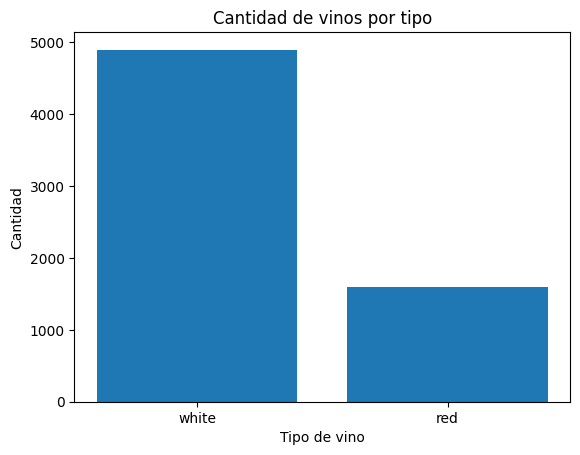

  Quality  Count
0   Legit   6251
1   Fraud    246
  Quality  Proportion
0   Legit    0.962136
1   Fraud    0.037864


In [33]:
# Grafico de barras para la variable categórica "type"
type_counts = df['type'].value_counts()
plt.bar(type_counts.index, type_counts.values)
plt.title('Cantidad de vinos por tipo')
plt.xlabel('Tipo de vino')
plt.ylabel('Cantidad')
plt.show()

# Tabla de frecuencia para la variable categórica "quality"
quality_counts = df['quality'].value_counts()
quality_freq_table = pd.DataFrame({'Quality': quality_counts.index, 'Count': quality_counts.values})
print(quality_freq_table)

# Tabla de proporciones para la variable categórica "quality"
quality_prop_table = pd.DataFrame({'Quality': quality_counts.index, 'Proportion': quality_counts.values / len(df)})
print(quality_prop_table)

Elabora gráficos adecuados según el tipo de dato que representan

Las variables cuantitativas del conjunto de datos son:

    fixed acidity
    volatile acidity
    citric acid
    residual sugar
    chlorides
    free sulfur dioxide
    total sulfur dioxide
    density
    pH
    sulphates
    alcohol

Las variables categóricas del conjunto de datos son:

    quality
    type

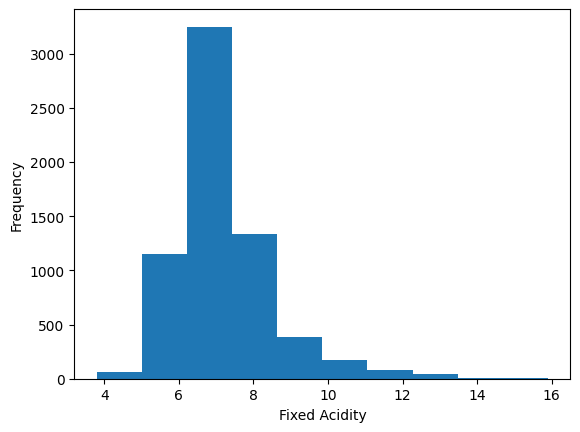

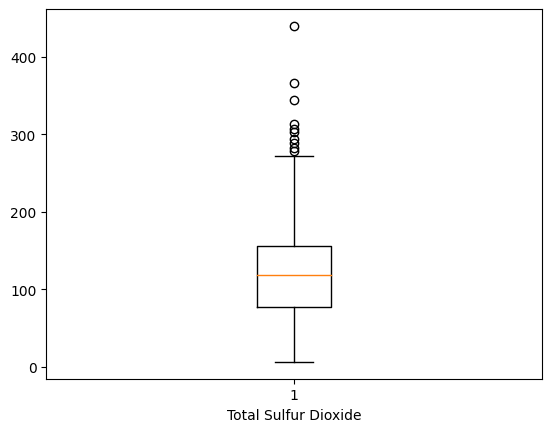

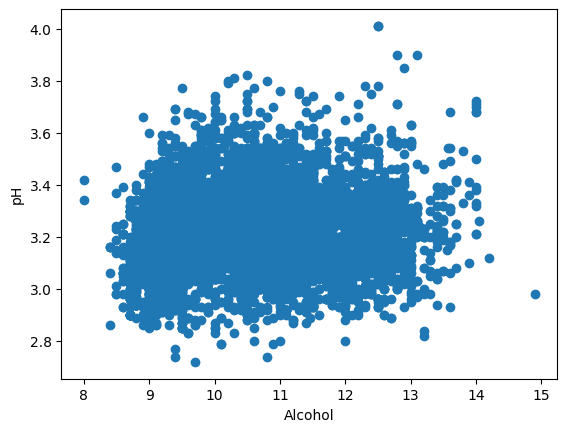

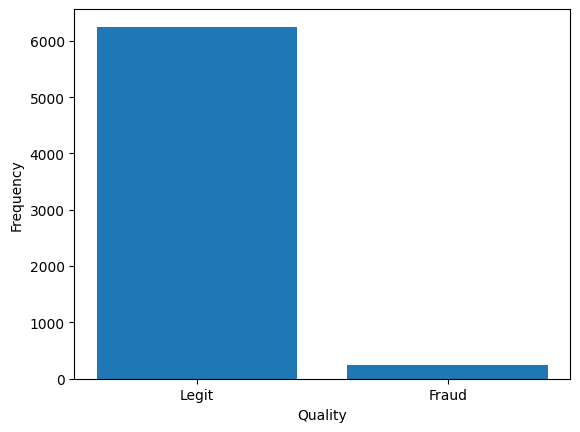

white    4898
red      1599
Name: type, dtype: int64
white    0.753886
red      0.246114
Name: type, dtype: float64


In [34]:
# Histograma de la variable "fixed acidity"
plt.hist(df['fixed acidity'])
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.show()

# Boxplot de la variable "total sulfur dioxide
plt.boxplot(df['total sulfur dioxide'])
plt.xlabel('Total Sulfur Dioxide')
plt.show()

# Gráfico de dispersión de las variables "alcohol" y "pH"
plt.scatter(df['alcohol'], df['pH'])
plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.show()

# Gráfico de barras de la variable "quality"
quality_counts = df['quality'].value_counts()
plt.bar(quality_counts.index, quality_counts.values)
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

# Tabla de frecuencia de la variable "type"
type_counts = df['type'].value_counts()
print(type_counts)

# Tabla de proporciones de la variable "type"
type_proportions = df['type'].value_counts(normalize=True)
print(type_proportions)

Realiza la limpieza de datos para que se tenga un conjunto de datos que permita usar modelos

In [35]:
# Convertir la variable categórica 'type' a numérica
quality_dict = {'red': 0, 'white': 1}
df['type'] = df['type'].map(quality_dict)

In [36]:
# Convertir la variable categórica 'quality' a numérica
quality_dict = {'Fraud': 0, 'Legit': 1}
df['quality'] = df['quality'].map(quality_dict)

In [37]:
# Verificar si hay valores faltantes
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


In [38]:
# Identificar valores atípicos
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

<AxesSubplot: >

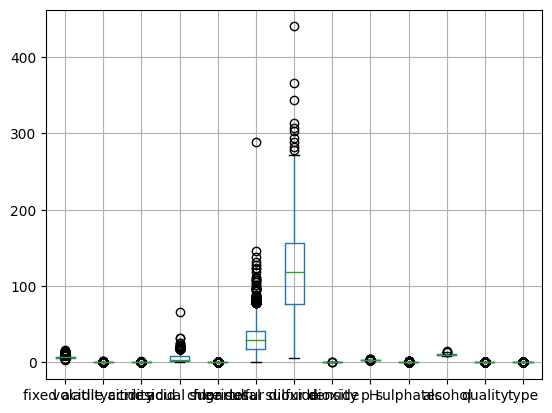

In [41]:
# Visualizar los valores atípicos mediante diagramas de caja y bigotes
df.boxplot(column=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality','type'])

# No se eliminan valores atípicos, ya que consideramos que no afectan significativamente al análisis

In [40]:
df.to_csv('wine_fraud_clean.csv', index=False)